# Example of Using Image Recognition

This example uses a model Xception trained against imagenet to classify
1000 different types of images. It returns a top match of the top number
of possible matches with the likihold of a match.

In [1]:
#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications import xception
%matplotlib inline

In [3]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
#model=tf.keras.applications.ResNet50(weights="imagenet",include_top=True)

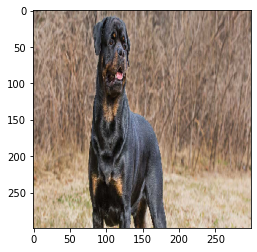

In [4]:
#cat.jpg|knights.jpg|dog.jpg|lion.jpg|
IMAGE_PATH='../tests/dog.jpg' 
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(img)
#view the image
plt.imshow(img/255.)

In [8]:
import requests

In [9]:
#fetching labels from Imagenet  
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()

In [10]:
imgnet_map={v[1]:k for k, v in imgnet_map.items()}

In [5]:
img=tf.keras.applications.xception.preprocess_input(img)
predictions=model.predict(np.array([img]))
xception.decode_predictions(predictions,top=5)

[[('n02106550', 'Rottweiler', 0.7711558),
  ('n02107142', 'Doberman', 0.077036336),
  ('n02089078', 'black-and-tan_coonhound', 0.008254567),
  ('n02101006', 'Gordon_setter', 0.0063139615),
  ('n02107312', 'miniature_pinscher', 0.0049000955)]]